### Домашняя работа к Уроку 3
### Студент: Абрамов А.В.

#### 1. Попробуйте улучшить работу нейронной сети (разобранную на уроке), обучавшейся на датасет Fashion-MNIST. Напишите в комментариях к уроку, какого результата вы добились от нейросети и что помогло улучшить её точность

In [83]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import fashion_mnist

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy

In [90]:
(X_train, y_train_labels), (X_test, y_test_labels) = fashion_mnist.load_data()

In [91]:
class_names = ['T-shirt/top',
               'Trouser',
               'Pullover',
               'Dress',
               'Coat',
               'Sandal',
               'Shirt',
               'Sneaker',
               'Bag',
               'Ankle boot']

In [92]:
y_train = to_categorical(y_train_labels)
y_test = to_categorical(y_test_labels)

In [93]:
X_train = X_train / 255.0
X_test = X_test / 255.0

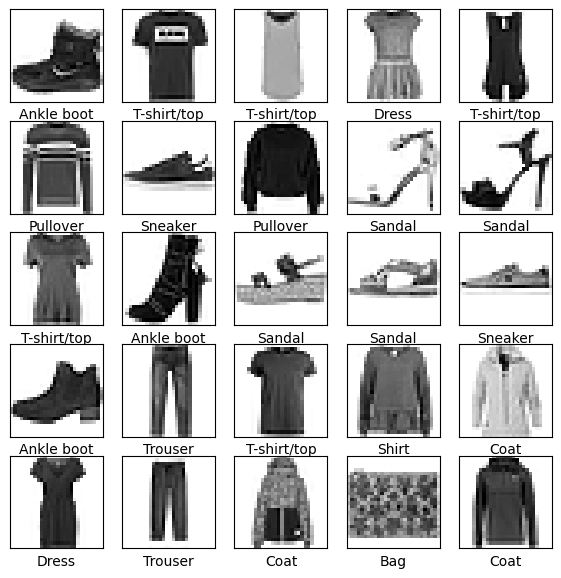

In [94]:
plt.figure(figsize=(7, 7))

for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_labels[i]])
plt.show()

In [190]:
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(392, activation='relu'),
    Dense(196, activation='relu'),
    #Dense(98, activation='relu'),
    Dense(10)
])

model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_28 (Flatten)        (None, 784)               0         
                                                                 
 dense_76 (Dense)            (None, 392)               307720    
                                                                 
 dense_77 (Dense)            (None, 196)               77028     
                                                                 
 dense_78 (Dense)            (None, 10)                1970      
                                                                 
Total params: 386718 (1.48 MB)
Trainable params: 386718 (1.48 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [191]:
model.compile(optimizer='Adam',
              loss=CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [192]:
model.fit(X_train, y_train,
          epochs=100,
          batch_size=1000,
          validation_data=(X_test, y_test))

Epoch 1/100
60/60 [==============================] - 1s 11ms/step - loss: 0.6966 - accuracy: 0.7634 - val_loss: 0.4853 - val_accuracy: 0.8315
Epoch 2/100
60/60 [==============================] - 1s 9ms/step - loss: 0.4271 - accuracy: 0.8507 - val_loss: 0.4244 - val_accuracy: 0.8505
Epoch 3/100
60/60 [==============================] - 1s 9ms/step - loss: 0.3763 - accuracy: 0.8676 - val_loss: 0.4017 - val_accuracy: 0.8599
Epoch 4/100
60/60 [==============================] - 1s 9ms/step - loss: 0.3502 - accuracy: 0.8753 - val_loss: 0.3798 - val_accuracy: 0.8645
Epoch 5/100
60/60 [==============================] - 1s 9ms/step - loss: 0.3295 - accuracy: 0.8818 - val_loss: 0.3646 - val_accuracy: 0.8675
Epoch 6/100
60/60 [==============================] - 1s 9ms/step - loss: 0.3080 - accuracy: 0.8890 - val_loss: 0.3470 - val_accuracy: 0.8739
Epoch 7/100
60/60 [==============================] - 1s 9ms/step - loss: 0.2934 - accuracy: 0.8947 - val_loss: 0.3508 - val_accuracy: 0.8716
Epoch 8/100


Epoch 59/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0605 - accuracy: 0.9791 - val_loss: 0.4707 - val_accuracy: 0.8928
Epoch 60/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0509 - accuracy: 0.9827 - val_loss: 0.4780 - val_accuracy: 0.8894
Epoch 61/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0531 - accuracy: 0.9814 - val_loss: 0.4784 - val_accuracy: 0.8926
Epoch 62/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0564 - accuracy: 0.9794 - val_loss: 0.4908 - val_accuracy: 0.8899
Epoch 63/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0515 - accuracy: 0.9819 - val_loss: 0.4914 - val_accuracy: 0.8947
Epoch 64/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0445 - accuracy: 0.9850 - val_loss: 0.5249 - val_accuracy: 0.8869
Epoch 65/100
60/60 [==============================] - 1s 9ms/step - loss: 0.0479 - accuracy: 0.9830 - val_loss: 0.4995 - val_accuracy: 0.8905
Epoch 

In [193]:
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)

313/313 - 0s - loss: 0.6610 - accuracy: 0.8922 - 340ms/epoch - 1ms/step


### Выводы: подбирая различные параметры нейросети, ощутимого увеличения точности предсказания на валидационной выборке (accuracy=0.99) получилось достичь, применяя модель с 2 скрытыми слоями, функцией активации ReLU, оптимизатором ГС - Adam, batch_size от 1000 до 4000. Отдельно стоит отметить роль кол-ва эпох (прогонов) при обучении модели: этот параметр при его кратном увеличении (к примеру epochs=100) заметно увеличивает точность предсказания, однако этот же параметр напрямую влияет на время обучения модели. Поэтому необходимо искать компромисс между растущей точностью (рост точности, кстати, замедляется с каждым новым прогоном) и растущими временными затратами на обучение модели. Для этого необходимо фиксировать целевое значение точности (и/или др. качественных показателей модели).
